# Mathematical Underpinnings - Lab 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import scale

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso

## Task 1

In [4]:
df = pd.read_csv('prostate.data', sep="\t", index_col=0)

In [5]:
X = np.array(df.iloc[:, 0:8])
Y = np.array(df.iloc[:, 8])

In [6]:
X = scale(X)
Y = scale(Y)

### a)

In [7]:
mod_lars = Lars(fit_intercept=False)
mod_lars.fit(X, Y)

Lars(fit_intercept=False)

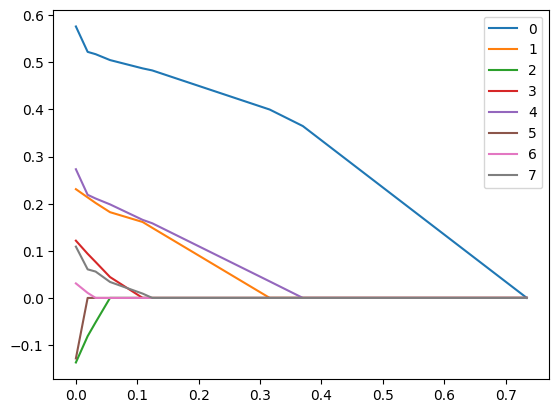

In [8]:
plt.plot(mod_lars.alphas_, mod_lars.coef_path_.T)
plt.legend(range(8))
plt.show()

Order in which the variables are included in the model:

In [9]:
np.argsort(-mod_lars.coef_path_.T[8])

array([0, 4, 1, 3, 7, 6, 5, 2], dtype=int64)

### b)

In [10]:
mod_lars.alphas_[0]

0.7344603262136732

In [11]:
np.corrcoef(X.T, Y)[-1,:8], np.max(np.corrcoef(X.T, Y)[-1,:8])

(array([0.73446033, 0.43331938, 0.16959284, 0.1798094 , 0.56621822,
        0.54881317, 0.36898681, 0.42231586]),
 0.7344603262136736)

### b1)

In [12]:
selected_variables = []

In [13]:
selected_variables.append(np.argmax(np.corrcoef(X.T, Y)[-1,:8]))

### b2)

In [14]:
mod1 = LinearRegression(fit_intercept=False)
mod1.fit(X[:, selected_variables], Y)

LinearRegression(fit_intercept=False)

In [15]:
Ypred = mod1.predict(X[:, [selected_variables[0]]])

### b3)

In [16]:
corr_tilde_alpha_seq = np.zeros((100, 8))
tilde_alpha_seq = np.linspace(0, 1, 100)
for i in range(100):
    res1 = Y - tilde_alpha_seq[i]*np.dot(X[:, selected_variables], mod1.coef_)
    corr_tilde_alpha_seq[i, :] = np.corrcoef(X.T, res1.T)[-1, :8]

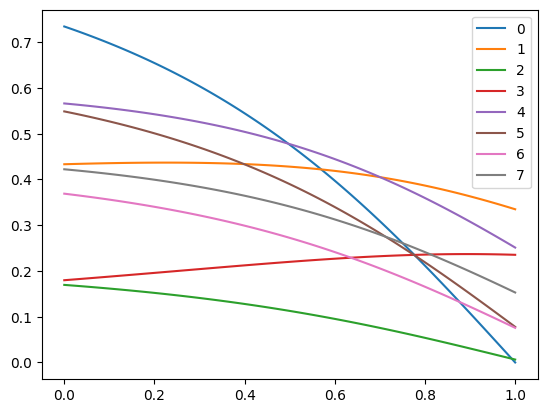

In [17]:
plt.plot(tilde_alpha_seq, corr_tilde_alpha_seq)
plt.legend(range(8))
plt.show()

### b4)

In [18]:
for i in range(100):
    argmax = np.argsort(corr_tilde_alpha_seq[i])[-1]
    if not argmax == selected_variables[-1]:
        print(argmax, corr_tilde_alpha_seq[i][argmax])
        break

4 0.475839409585433


### b5)

$$ \textrm{Cor}(Y - \tilde\alpha\hat Y, X_i) = ... \cdot\textrm{Cor}(Y, X_i) - ... \cdot \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) $$

$$ \textrm{Cor}(Y - \tilde\alpha\hat Y, X_i) = \frac{\sqrt{\textrm{Var}(Y)}}{\sqrt{\textrm{Var}(Y-\tilde\alpha\hat Y)}} \textrm{Cor}(Y, X_i) - \frac{\sqrt{\textrm{Var}(\hat Y)}}{\sqrt{\textrm{Var}(Y-\tilde\alpha\hat Y)}} \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) $$

In our case, $i=0$, $j=4$:
$$ |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_i)| = |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_j)|$$

$$ |\sqrt{\textrm{Var}(Y)} \textrm{Cor}(Y, X_i) - \sqrt{\textrm{Var}(\hat Y)} \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i)| = |\sqrt{\textrm{Var}(Y)} \textrm{Cor}(Y, X_j) - \sqrt{\textrm{Var}(\hat Y)} \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_j)| $$

same signs

$$ \sqrt{\textrm{Var}(Y)} \textrm{Cor}(Y, X_i) - \sqrt{\textrm{Var}(\hat Y)} \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) = \sqrt{\textrm{Var}(Y)} \textrm{Cor}(Y, X_j) - \sqrt{\textrm{Var}(\hat Y)} \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_j) $$

$$ \tilde\alpha = \frac{\sqrt{\textrm{Var}(Y)} \textrm{Cor}(Y, X_i) - \sqrt{\textrm{Var}(Y)} \textrm{Cor}(Y, X_j)}{\sqrt{\textrm{Var}(\hat Y)} \textrm{Cor}(\hat Y, X_i) - \sqrt{\textrm{Var}(\hat Y)} \textrm{Cor}(\hat Y, X_j)} $$

different signs

$$ \sqrt{\textrm{Var}(Y)} \textrm{Cor}(Y, X_i) - \sqrt{\textrm{Var}(\hat Y)} \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) = - \sqrt{\textrm{Var}(Y)} \textrm{Cor}(Y, X_j) + \sqrt{\textrm{Var}(\hat Y)} \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_j) $$

$$ \tilde\alpha = \frac{\sqrt{\textrm{Var}(Y)} \textrm{Cor}(Y, X_i) + \sqrt{\textrm{Var}(Y)} \textrm{Cor}(Y, X_j)}{\sqrt{\textrm{Var}(\hat Y)} \textrm{Cor}(\hat Y, X_i) + \sqrt{\textrm{Var}(\hat Y)} \textrm{Cor}(\hat Y, X_j)} $$

In [19]:
cor_xy = np.corrcoef(X.T, Y)[-1, :8]
cor_xypred = np.corrcoef(X.T, Ypred)[-1, :8]

In [20]:
corr_tilde_alpha_seq = np.zeros((100, 8))
tilde_alpha_seq = np.linspace(0, 1, 100)
for i in range(100):
    corr_tilde_alpha_seq[i, :] = np.sqrt(np.var(Y))*cor_xy - np.sqrt(np.var(Ypred))*tilde_alpha_seq[i]*cor_xypred

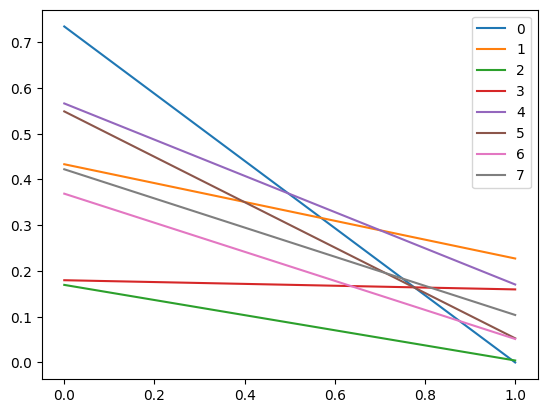

In [21]:
plt.plot(tilde_alpha_seq, corr_tilde_alpha_seq)
plt.legend(range(8))
plt.show()

In [22]:
alphas_tilde = np.sqrt(np.var(Y))*(cor_xy[selected_variables] - cor_xy)/np.sqrt(np.var(Ypred))/(cor_xypred[selected_variables] - cor_xypred)
alpha_tilde1 = np.nanmin(alphas_tilde)
alpha_tilde1

C:\Users\kmarc\AppData\Local\Temp\ipykernel_11900\3138422193.py:1: RuntimeWarning: invalid value encountered in divide
  alphas_tilde = np.sqrt(np.var(Y))*(cor_xy[selected_variables] - cor_xy)/np.sqrt(np.var(Ypred))/(cor_xypred[selected_variables] - cor_xypred)


0.49672890138719533

### b6)

In [23]:
alpha2 = np.sqrt(np.var(Y))*cor_xy[4] - alpha_tilde1*np.sqrt(np.var(Ypred))*cor_xypred[4]
alpha2

0.3696326552610747

In [24]:
for i in range(100):
    argmax = np.argsort(corr_tilde_alpha_seq[i])[-1]
    if argmax not in selected_variables:
        selected_variables.append(argmax)
        break
selected_variables

[0, 4]

### b7)

In [25]:
Y2 = Y - alpha_tilde1*Ypred

In [26]:
mod2 = LinearRegression(fit_intercept=False)
mod2.fit(X[:, selected_variables], Y2)

LinearRegression(fit_intercept=False)

### b8)

In [27]:
Ypred2 = mod2.predict(X[:, selected_variables])

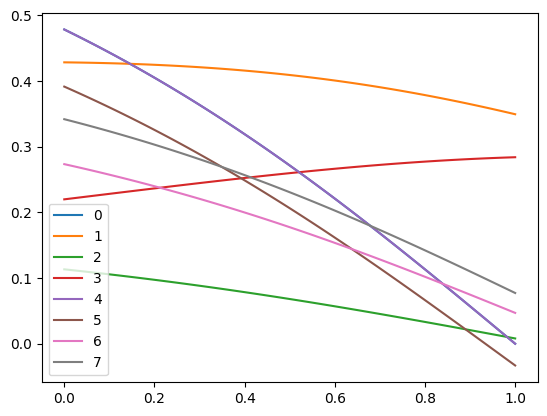

In [28]:
corr_tilde_alpha_seq = np.zeros((100, 8))
tilde_alpha_seq = np.linspace(0, 1, 100)

for i in range(100):
    new_r2 = Y2 - tilde_alpha_seq[i]*Ypred2
    corr_tilde_alpha_seq[i, :] = np.corrcoef(X.T, new_r2)[-1, :8]

plt.plot(tilde_alpha_seq, corr_tilde_alpha_seq)
plt.legend(range(8))
plt.show()

### b9)

In [29]:
for i in range(100):
    argmax = np.argsort(corr_tilde_alpha_seq[i])[-1]
    if not argmax == selected_variables[-1]:
        print(argmax, corr_tilde_alpha_seq[i][argmax])
        break

1 0.4258816440916222


### b10)

In [30]:
cor_xy = np.corrcoef(X.T, Y2)[-1, :8]
cor_xypred = np.corrcoef(X.T, Ypred2)[-1, :8]

alphas_tilde = np.sqrt(np.var(Y2))*(cor_xy[selected_variables[-1]] - cor_xy)/np.sqrt(np.var(Ypred2))/(cor_xypred[selected_variables[-1]] - cor_xypred)
alpha_tilde2 = np.nanmin(alphas_tilde)
alpha_tilde2

C:\Users\kmarc\AppData\Local\Temp\ipykernel_11900\581904757.py:4: RuntimeWarning: invalid value encountered in divide
  alphas_tilde = np.sqrt(np.var(Y2))*(cor_xy[selected_variables[-1]] - cor_xy)/np.sqrt(np.var(Ypred2))/(cor_xypred[selected_variables[-1]] - cor_xypred)


0.14590879649354793

### b11)

In [31]:
alpha3 = np.sqrt(np.var(Y2))*cor_xy[1] - alpha_tilde2*np.sqrt(np.var(Ypred2))*cor_xypred[1]
alpha3

0.31569999938721677